# Pymaceuticals Inc.
---

### Analysis

Three observations or inferences can be made from the following data analysis:
 First, the Propriva was tested on fewer mice than the other nine treatment regimens.
 Second, mice treated with Capomulin and Ramicane appear to have lower mean tumor volumes than mice treated with Infubinol and Ceftamin.
 Finally, among mice treated using Capomulin, as mouse weight increases, so too does tumor size.
 

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [120]:
# Checking the number of mice.
uniquemice=combined['Mouse ID'].nunique()
uniquemice

249

In [121]:
#There are 10 timepoints [0,5,10,15,20,25,30,35,40,45]
#micegrps = combined.groupby('Timepoint')
#nbytimepoint = micegrps['Mouse ID'].count()
#nbytimepoint

In [122]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#First, I created 10 datasets for each time point
unique_timepoints = combined['Timepoint'].unique()
timepointsdfs = {}
for timepoint in unique_timepoints:
    timepointdf = combined[combined['Timepoint']==timepoint]
    timepointsdfs[timepoint] =  timepointdf

#Then, I located the duplicate IDs within eachdataset
for timepoint, df in timepointsdfs.items():
    duplicates = df[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
    if not duplicates.empty:
        print("Duplicates in Timepoint", timepoint, ":")
        print(duplicates[['Mouse ID', 'Timepoint']])

#Note, I used Chat GPT to help debug my code

Duplicates in Timepoint 0 :
    Mouse ID  Timepoint
908     g989          0
909     g989          0
Duplicates in Timepoint 5 :
    Mouse ID  Timepoint
910     g989          5
911     g989          5
Duplicates in Timepoint 10 :
    Mouse ID  Timepoint
912     g989         10
913     g989         10
Duplicates in Timepoint 15 :
    Mouse ID  Timepoint
914     g989         15
915     g989         15
Duplicates in Timepoint 20 :
    Mouse ID  Timepoint
916     g989         20
917     g989         20


In [123]:
# Optional: Get all the data for the duplicate mouse ID. 
g989=combined.loc[combined['Mouse ID']=='g989']
g989.to_csv('g989_data.csv', index = False)

In [124]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#The duplicate values are at times 0, 5, 10, 15, and 20
#combined2=combined.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
#combined2
#combined2.to_csv('combined2.csv', index = False)

#It looks like the below instructions want us to get an N = 248, so here I am dropping g989's data entirely, 
#not just the duplicates
combined3=combined[combined['Mouse ID']!='g989']
combined3



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [125]:
# Checking the number of mice in the clean DataFrame.
uniquemice=combined3['Mouse ID'].nunique()
uniquemice

248

## Summary Statistics

In [126]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen=combined3['Drug Regimen'].unique()
regimen
summarybyreg = combined3.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summarybyreg = summarybyreg.rename(columns={
        'mean': 'Mean',
        'median': 'Median',
        'var': 'Variance',
        'std': 'Standard Deviation',
        'sem': 'Standard Error of the Mean (SEM)'
})
summarybyreg



,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [127]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

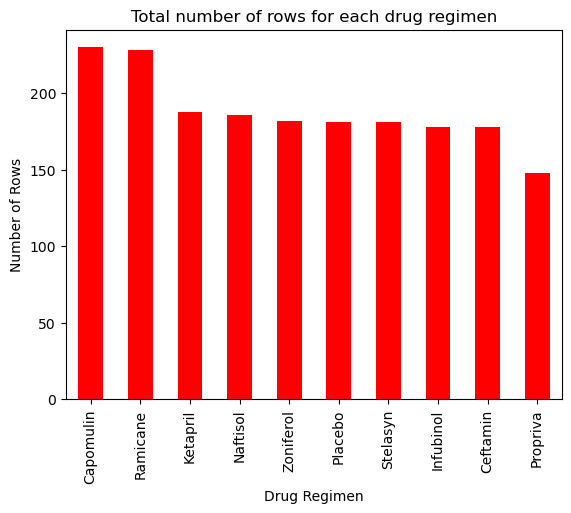

In [128]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimencounts=combined3['Drug Regimen'].value_counts()
regimencounts.plot(kind='bar', color = 'red', align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total number of rows for each drug regimen')
plt.show()

Text(0.5, 1.0, 'Total number of rows for each drug regimen')

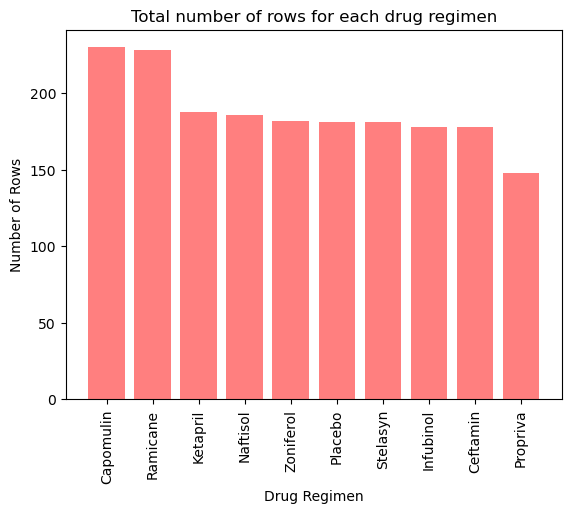

In [129]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs=combined3['Drug Regimen'].value_counts()
x_axis = range(len(drugs))
plt.bar(x_axis, drugs, color='r', alpha=0.5, align='center')
plt.xticks(x_axis, drugs.index, rotation=90);
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total number of rows for each drug regimen')

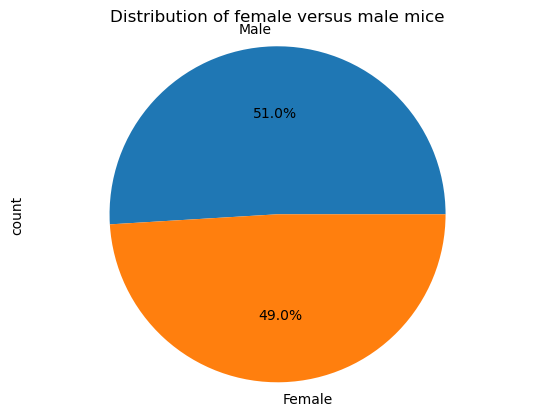

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ["Male", "Female"]
sizes = combined3['Sex'].value_counts()

sizes.plot.pie(labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of female versus male mice')
plt.show()

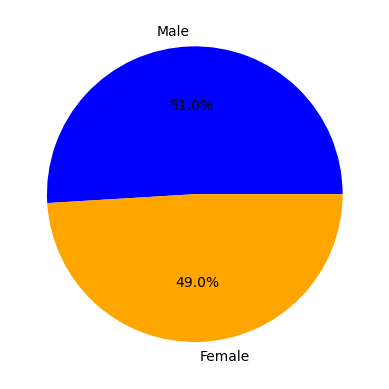

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors=["blue", "orange"]
plt.pie(sizes,labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [132]:
combined3.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [133]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttime = combined3.groupby('Mouse ID')['Timepoint'].max()
lasttime

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [134]:
#Filter on the timepoint to extract as a variable-
last_timepoint_df = pd.DataFrame(lasttime).reset_index()
last_timepoint_df.rename(columns={"Timepoint":"Final Timepoint"},inplace=True)
last_timepoint_df.head()

,Mouse ID,Final Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [135]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined4=pd.merge(combined3,last_timepoint_df,on="Mouse ID", how="inner")


In [136]:
print(combined4.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Final Timepoint'],
      dtype='object')


In [137]:
#I used ChatGPT here, I kept getting NaN for the final tumor volume for the timepoints that
#were not the final timepoint. It helped me with the to_dict code.

finaltumorvolumepermouse = combined4.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

mousetofinaltumorvol=finaltumorvolumepermouse.to_dict()

finaltumorvol = []

for index, row in combined4.iterrows():
    mouseid = row['Mouse ID']
    finaltumorvolume=mousetofinaltumorvol[mouseid]
    finaltumorvol.append(finaltumorvolume)

combined4['Tumor Volume at Last Timepoint'] = finaltumorvol

combined4.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Timepoint,Tumor Volume at Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,45,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,45,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,45,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,45,22.050126
5,k403,Ramicane,Male,21,16,25,33.464577,1,45,22.050126
6,k403,Ramicane,Male,21,16,30,31.099498,1,45,22.050126
7,k403,Ramicane,Male,21,16,35,26.546993,1,45,22.050126
8,k403,Ramicane,Male,21,16,40,24.365505,1,45,22.050126
9,k403,Ramicane,Male,21,16,45,22.050126,1,45,22.050126


In [138]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = combined4['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr

print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]}")

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)
print(f"Values below {lowerbound} could be outliers")
print(f"Values above {upperbound} could be outliers")

# Determine outliers using upper and lower bounds
outliermice = combined3.loc[(combined3['Tumor Volume (mm3)']
<lowerbound)|(combined3['Tumor Volume (mm3)']>upperbound)]
outliermice    

Lower quartile: 45.0
Upper quartile: 56.32407510749999
IQR: 11.324075107499993
Median: 48.933453655
Values below 28.01388733875001 could be outliers
Values above 73.31018776874998 could be outliers


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
567,a818,Naftisol,Female,12,28,45,74.997764,2
679,c402,Stelasyn,Female,1,27,45,74.040390,3
850,f545,Zoniferol,Female,20,26,45,73.324432,1
930,h246,Ketapril,Male,13,30,45,74.104086,2
1043,k382,Ketapril,Male,22,29,45,73.715619,4


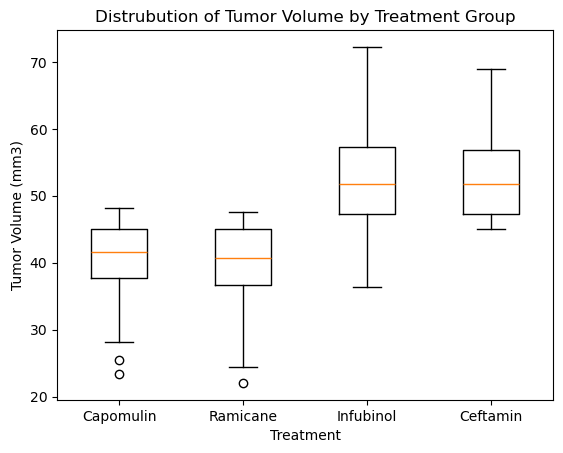

In [139]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Put treatments into a list for for loop (and later for plot labels)
Treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
TumorVol=[]

for treatment in Treatments:
    treatmentgroup=combined4[combined4['Drug Regimen']==treatment]
    tumorvolume=treatmentgroup['Tumor Volume (mm3)'].values
    TumorVol.append(tumorvolume)

plt.boxplot(TumorVol, labels=Treatments)
plt.title('Distrubution of Tumor Volume by Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Treatment')
plt.show()

## Line and Scatter Plots

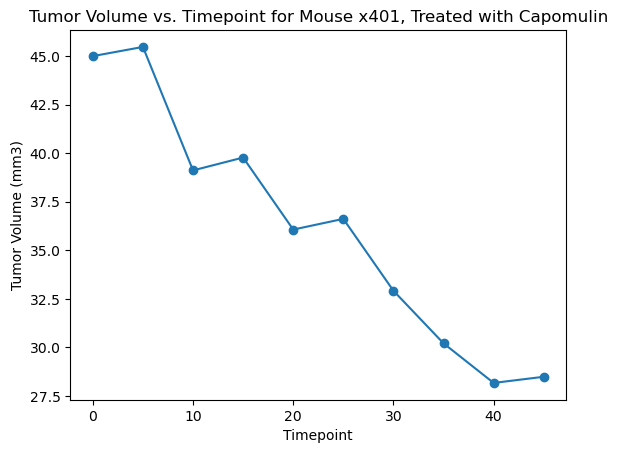

In [140]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Put treatments into a list for for loop (and later for plot labels)
CapomulinGroup=combined4[combined4['Drug Regimen'] == 'Capomulin']
#CapomulinGroup.head(50)
Mouse_ID='x401'

MouseData=CapomulinGroup[CapomulinGroup['Mouse ID']==Mouse_ID]

plt.plot(MouseData['Timepoint'], MouseData['Tumor Volume (mm3)'], marker='o')
plt.title(f'Tumor Volume vs. Timepoint for Mouse x401, Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [141]:
CapomulinGroup.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Timepoint,Tumor Volume at Last Timepoint
10,s185,Capomulin,Female,3,17,0,45.000000,0,45,23.343598
11,s185,Capomulin,Female,3,17,5,43.878496,0,45,23.343598
12,s185,Capomulin,Female,3,17,10,37.614948,0,45,23.343598
13,s185,Capomulin,Female,3,17,15,38.177232,0,45,23.343598
14,s185,Capomulin,Female,3,17,20,36.866876,0,45,23.343598


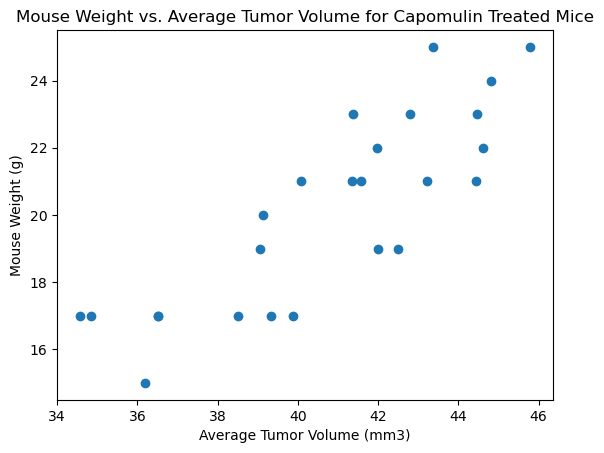

In [142]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
averagetumorvol=CapomulinGroup.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouseweight=CapomulinGroup.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(averagetumorvol, mouseweight)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treated Mice')
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.show()

## Correlation and Regression

In [143]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(CapomulinGroup['Weight (g)'], CapomulinGroup['Tumor Volume (mm3)'])
print(f"The Pearson's R Correlation between mouse weight in grams and tumor volume in mm3 is {round(correlation[0],2)}")


pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress((CapomulinGroup['Weight (g)'], CapomulinGroup['Tumor Volume (mm3)'])) 
print(f"The slope of mouse weight and tumor volume for Capomulin is {round(pe_slope,2)}")
print(f"The intercept of mouse weight and tumor volume for Capomulin is {round(pe_int,2)}")
print(f"The R value for the model mouse weight and tumor volume for Capomulin is {round(pe_int,2)}")
print(f"The p-value of the slope of mouse weight and tumor volume for Capomulin is {round(pe_p,8)}")
print(f"The standard error of the intercept of mouse weight and tumor volume for Capomulin is {round(pe_std_err,2)}")

The Pearson's R Correlation between mouse weight in grams and tumor volume in mm3 is 0.53
The slope of mouse weight and tumor volume for Capomulin is 0.96
The intercept of mouse weight and tumor volume for Capomulin is 21.49
The R value for the model mouse weight and tumor volume for Capomulin is 21.49
The p-value of the slope of mouse weight and tumor volume for Capomulin is 0.0
The standard error of the intercept of mouse weight and tumor volume for Capomulin is 0.1
